
Krishna Kant Verma


Roll No 2211CS19




In [ ]:
import pprint
import numpy as np
import pandas as pd
import nltk
import re
import warnings
warnings.filterwarnings("ignore")
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
from google.colab import files
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

In [ ]:
df = pd.read_csv("NER-Dataset-Train.csv")

In [ ]:
df.head()

,@LewisDixon\tO
0,Trust\tO
1,me\tO
2,!\tO
3,im\tO
4,gonna\tO


In [ ]:
df.shape

(1199, 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   @LewisDixon	O  1142 non-null   object
dtypes: object(1)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,@LewisDixon\tO
count,1142
unique,662
top,",\tO"
freq,36


In [ ]:
df.isnull().sum()

@LewisDixon\tO    57
dtype: int64

In [ ]:
sentences_words=[]
sentences_tags=[]
file = open('NER-Dataset-Train.txt', 'r')
lines = file.readlines()
temp_sentence_words=[]
temp_sentence_tags=[]
for line in lines:
    if line=="\n":#Sentences ends at every blank line
        if len(temp_sentence_words)==0:#If zero length sentence is formed, then ignore
            continue
        sentences_words.append(temp_sentence_words)
        temp_sentence_words=[]
        sentences_tags.append(temp_sentence_tags)
        temp_sentence_tags=[]
        continue
    temp=line.split("\t")#splitting to get the tag and the word
    temp[1]=temp[1].split("\n")[0]
    temp_sentence_words.append(temp[0])
    temp_sentence_tags.append(temp[1])
file.close()

In [ ]:
sentences_words

[['@LewisDixon',
  'Trust',
  'me',
  '!',
  'im',
  'gonna',
  'be',
  'bringing',
  'out',
  'music',
  'like',
  'theres',
  'no',
  'tomorrow',
  ',',
  'Be',
  'doing',
  'pure',
  'blog',
  'videos',
  '&amp;',
  'freestyle',
  'videos',
  '#Moesh',
  '!'],
 ['@joshHnumber1fan',
  'its',
  'okay',
  'then',
  '..',
  'make',
  'it',
  'when',
  'it',
  'works',
  ':D'],
 ['Asprin',
  ',',
  'check',
  ',',
  'cup',
  'of',
  'tea',
  ',',
  'check',
  ',',
  'pillow',
  ',',
  'check',
  ',',
  'warm',
  'sleeping',
  'bag',
  ',',
  'check',
  ',',
  'fanfiction',
  'on',
  'the',
  'laptop',
  ',',
  'check',
  '.',
  'Time',
  'to',
  'settle',
  'down',
  'and',
  'relax'],
 ['@angelportugues',
  'LMAO',
  '!',
  'When',
  'is',
  'tht',
  'one',
  'day',
  '?:',
  'P'],
 ['The',
  'Basic',
  'Step',
  'Before',
  'You',
  'Even',
  'Start',
  'Thinking',
  'Of',
  'Making',
  'Your',
  '...:',
  'Keyword',
  'research',
  'is',
  'a',
  'well',
  'known',
  'subject',
  ',',

In [ ]:
sum(len(row) for row in sentences_words)
sum(len(row) for row in sentences_tags)
len(sentences_words[0])

25

In [ ]:
list5=[]
for i in range(len(sentences_words)):
    list4=[]
    for j in range(len(sentences_words[i])):
        list1=[]
        list1.append(sentences_words[i][j])
        list1.append(sentences_tags[i][j])
        list4.append(tuple(list1))
    list5.append(list4)

In [ ]:
len(list5)

900

In [ ]:
sum(len(row) for row in list5)

17480

In [ ]:
# Splitting into train and test
import random
random.seed(1)
train_set, test_set = train_test_split(list5,test_size=0.30)
print(len(train_set))
print(len(test_set))

630
270


In [ ]:
# Getting list of tagged words
Tagged_words = [tup for sent in train_set for tup in sent]
len(Tagged_words)

12152

In [ ]:
# Word_Token 
Word_Token = [pair[0] for pair in Tagged_words]
print(len(Word_Token))

12152


In [ ]:
# vocabulary
V = set(Word_Token)
print(len(V))

3955


In [ ]:
# number of tags
T = set([pair[1] for pair in Tagged_words])
print(len(T))
T

3


{'B', 'I', 'O'}

Emission Probabilities P(w/t)

In [ ]:
#Calculating P(w/t) 
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

#Calculating  Probability of a word given a tag: Emission Probability
def prob_of_word_given_tag(word, tag, train_bag = Tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

Transition Probabilities P(t2/t1)

In [ ]:
#Calculating the Probability of a tag given a tag: P(t2/t1) i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = Tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])      #Counting number of occurences of t1
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2: #Counting number of times t2 follows t1
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

Transition matrix : Containing Probabilities of Transition From Tag1 to Tag2

In [ ]:
# We will now create a Transition matrix of tags of dimension t x t
# Considering each column t2 and each row as t1
#Thus element M(i, j) is equivalent to Probability of tj given ti : P(tj given ti)

tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [ ]:
tags_matrix

array([[0.        , 0.55155873, 0.44844124],
       [0.03608157, 0.96383125, 0.        ],
       [0.01149425, 0.70498085, 0.2835249 ]], dtype=float32)

In [ ]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))

In [ ]:
tags_df

,B,O,I
B,0.000000,0.551559,0.448441
O,0.036082,0.963831,0.000000
I,0.011494,0.704981,0.283525


In [ ]:
tags_df.loc['O', :]

B    0.036082
O    0.963831
I    0.000000
Name: O, dtype: float32

Visualizing the Transition Matrix on Heat Map for better intuition

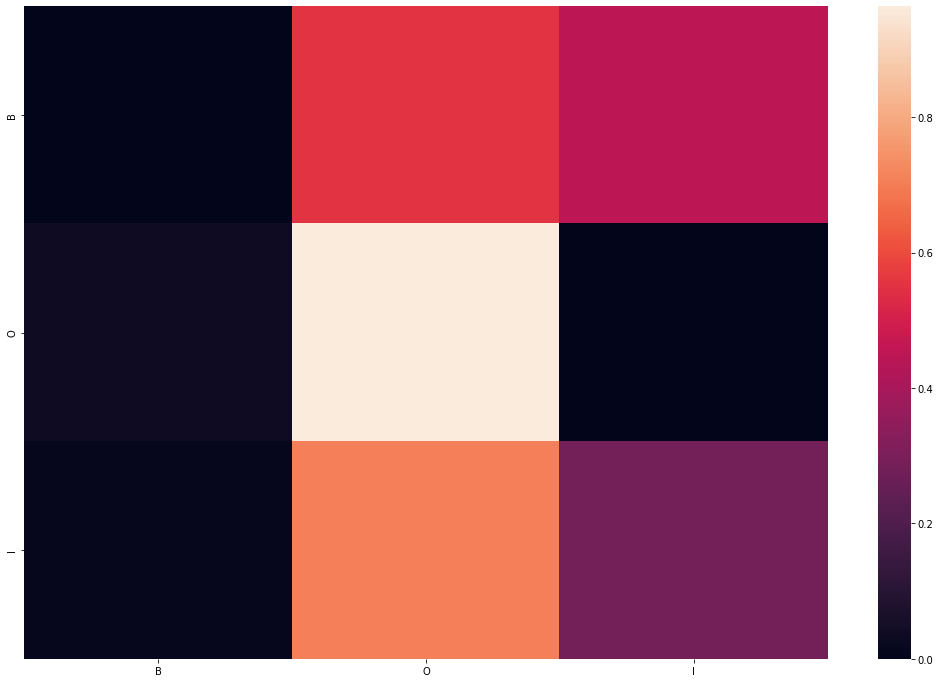

In [ ]:
# Heatmap of Tags matrix where T(i, j) = P(tag j given tag i)
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

In [ ]:
len(train_set)

630

Viterbi Algorithm

In [ ]:
# Viterbi_Algorithm Function !
def Viterbi_Algorithm(words, train_bag = Tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initializing a list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_probability = tags_df.loc['O', tag]      # P(tag|start) = P(tag|'.')
            else:
                transition_probability = tags_df.loc[state[-1], tag]
                
            #Calculating emission and state probabilities
            emission_probability = prob_of_word_given_tag(words[key], tag)[0]/prob_of_word_given_tag(words[key], tag)[1]
            state_probability = emission_probability * transition_probability    
            p.append(state_probability)
            
        pmax = max(p)
        # Finding the state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

Evaluating on Test Set



Testing

5-fold cross validation

In [ ]:
num_sents = len(list5)
k = 5
foldsize = int(num_sents/k)
foldsize

180

In [ ]:
fold_accurracies = []
fold_incorrect_tags =[]
timetaken=[]
tagged_seq_collection=[]
test_seq_collection=[]
for f in range(5):
    # Locate the test set in the fold.
    test_set = list5[f*foldsize:f*foldsize+foldsize]
    # Use the rest of the sent not in test for training.
    train_set = list5[:f*foldsize] + list5[f*foldsize+foldsize:]
   

    # Getting list of tagged words
    train_tagged_words = [tup for sent in train_set for tup in sent]
    #len(train_tagged_words)

    # tokens 
    tokens = [pair[0] for pair in train_tagged_words]

    # vocabulary
    V = set(tokens)
    # print(len(V))

    # number of tags
    T = set([pair[1] for pair in train_tagged_words])
    #len(T)

    #Calculating P(w/t)
    t = len(T)
    v = len(V)
    w_given_t = np.zeros((t, v))
    
    #Calculating the Probability of a tag given a tag: P(t2/t1) i.e. Transition Probability
    def t2_given_t1(t2, t1, train_bag = train_tagged_words):
        tags = [pair[1] for pair in train_bag]
        count_t1 = len([t for t in tags if t==t1])      #Counting number of occurences of t1
        count_t2_t1 = 0
        for index in range(len(tags)-1):
            if tags[index]==t1 and tags[index+1] == t2: #Counting number of times t2 follows t1
                count_t2_t1 += 1
        return (count_t2_t1, count_t1)

    # We will now create a Transition matrix of tags of dimension t x t
    # Considering each column t2 and each row as t1
    #Thus element M(i, j) is equivalent to Probability of tj given ti : P(tj given ti)

    tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
    for i, t1 in enumerate(list(T)):
        for j, t2 in enumerate(list(T)): 
            tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

    tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))
    
    # Running the Viterbi algorithm on a few sample sentences

    random.seed(1)

    # choose random 5 sents
    #rndom = [random.randint(1,len(test_set)) for x in range(5)]

    # list of sents
    #test_run = [test_set[i] for i in rndom]

    # list of tagged words
    test_run_base = [tup for sent in test_set for tup in sent]

    # list of untagged words
    test_tagged_words = [tup[0] for sent in test_set for tup in sent]
    
    #test_run
    # tagging the test sentences
    # tagging the test sentences
    start = time.time()
    tagged_seq = Viterbi_Algorithm(test_tagged_words)
    tagged_seq_collection.append(tagged_seq)
    test_seq_collection.append(test_set)
    end = time.time()
    difference = end-start
    timetaken.append(difference)
   
    # accuracy
    check = [i for i, j in zip(tagged_seq, test_run_base) if i == j]
    accuracy = len(check)/len(tagged_seq)
    fold_accurracies.append(accuracy)
    
    #Incorrect Tagging Tracker
    incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]
    fold_incorrect_tags.append(incorrect_tagged_cases)
   
    
    print("Fold", f)
    print('From ', f*foldsize, 'to', f*foldsize+foldsize)
    print('Accuracy =', accuracy )
    print("Time Taken :",timetaken[f])

Fold 0
From  0 to 180
Accuracy = 0.900280112044818
Time Taken : 25.015522956848145
Fold 1
From  180 to 360
Accuracy = 0.9441134751773049
Time Taken : 24.974628925323486
Fold 2
From  360 to 540
Accuracy = 0.8915135608048994
Time Taken : 25.332319736480713
Fold 3
From  540 to 720
Accuracy = 0.9249573621375782
Time Taken : 25.144351482391357
Fold 4
From  720 to 900
Accuracy = 0.9331006399069226
Time Taken : 24.96937584877014


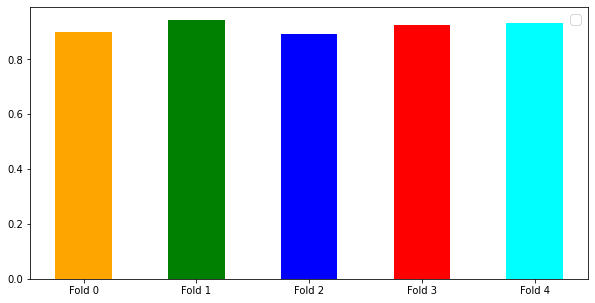

In [ ]:
a1=fold_accurracies[0]
a2=fold_accurracies[1]
a3=fold_accurracies[2]
a4=fold_accurracies[3]
a5=fold_accurracies[4]

labels=['Fold 0','Fold 1','Fold 2','Fold 3', 'Fold 4']
f, ax = plt.subplots(figsize=(10,5)) # set the size that you'd like (width, height)
plt.bar(labels, [a1,a2,a3,a4,a5], color=['orange','green','blue', 'red','cyan'],width=0.5)
ax.legend(fontsize = 14)

In [ ]:
fold_incorrect_tags

[[[(':D', 'O'), (('Asprin', 'B'), ('Asprin', 'O'))],
  [(',', 'O'), (('cup', 'B'), ('cup', 'O'))],
  [('cup', 'O'), (('of', 'I'), ('of', 'O'))],
  [('of', 'O'), (('tea', 'B'), ('tea', 'O'))],
  [(',', 'O'), (('pillow', 'B'), ('pillow', 'O'))],
  [('warm', 'O'), (('sleeping', 'B'), ('sleeping', 'O'))],
  [('sleeping', 'O'), (('bag', 'B'), ('bag', 'O'))],
  [(',', 'O'), (('fanfiction', 'B'), ('fanfiction', 'O'))],
  [('the', 'O'), (('laptop', 'B'), ('laptop', 'O'))],
  [('to', 'O'), (('settle', 'B'), ('settle', 'O'))],
  [('relax', 'O'), (('@angelportugues', 'B'), ('@angelportugues', 'O'))],
  [('day', 'O'), (('?:', 'B'), ('?:', 'O'))],
  [('?:', 'O'), (('P', 'B'), ('P', 'O'))],
  [('P', 'O'), (('The', 'I'), ('The', 'O'))],
  [('RT', 'O'), (('@Slijterijmeisje', 'B'), ('@Slijterijmeisje', 'O'))],
  [(':', 'O'), (('Kreeg', 'B'), ('Kreeg', 'O'))],
  [('Kreeg', 'O'), (('net', 'B'), ('net', 'O'))],
  [('een', 'O'), (('bruikbare', 'B'), ('bruikbare', 'O'))],
  [('bruikbare', 'O'), (('tip', 'B'

Maximum Accuracy

In [ ]:
print(max(fold_accurracies))
F=fold_accurracies.index(max(fold_accurracies))
print("Fold ",F)

0.9441134751773049
Fold  1


Class wise Accuracy

In [ ]:
#We will calculate Class wise of Fold with maximum accuracy 
fold_incorrect_tags[F]

[[('on', 'O'), (('HOLIDAY', 'B'), ('HOLIDAY', 'O'))],
 [('No', 'O'), (('tasting', 'B'), ('tasting', 'O'))],
 [('today', 'O'), (('due', 'B'), ('due', 'O'))],
 [('out', 'O'), (('Sick', 'B'), ('Sick', 'O'))],
 [('Mark', 'B'), (('Rowan', 'B'), ('Rowan', 'I'))],
 [('Novel', 'B'), (('Wines', 'B'), ('Wines', 'I'))],
 [('...', 'O'),
  (('http://fb.me/G2CLHL1H', 'B'), ('http://fb.me/G2CLHL1H', 'O'))],
 [('E', 'O'), (('@SaviiISJAPAN', 'B'), ('@SaviiISJAPAN', 'O'))],
 [('@SaviiISJAPAN', 'O'), (('nooo', 'B'), ('nooo', 'O'))],
 [('people', 'O'), (('lool', 'B'), ('lool', 'O'))],
 [('http://t.co/JfGm0uH', 'O'), (('@FritzTitz', 'B'), ('@FritzTitz', 'O'))],
 [('2', 'O'), (('tries', 'B'), ('tries', 'O'))],
 [('the', 'O'), (('2nd', 'B'), ('2nd', 'O'))],
 [('he', 'O'), (('became', 'B'), ('became', 'O'))],
 [(':)', 'O'), (('@shoeboxL', 'B'), ('@shoeboxL', 'O'))],
 [('Happy', 'O'), (('Birthday', 'B'), ('Birthday', 'O'))],
 [('!', 'O'), (('s/n', 'B'), ('s/n', 'O'))],
 [('Doc', 'B'), (('Lewis', 'B'), ('Lewis'

In [ ]:
#Total Incorrect Tagging in the chosen Fold is :
ic=len(fold_incorrect_tags[F])
print("Total Incorrect Tagging in the chosen Fold is :",ic)

Total Incorrect Tagging in the chosen Fold is : 197


In [ ]:
length=len((fold_incorrect_tags[F]))
length

197

In [ ]:
lista=[]
for i in range(0,length):
    lista.append(((fold_incorrect_tags[F][i])[1])[0])
len(lista)

197

In [ ]:
lista

[('HOLIDAY', 'B'),
 ('tasting', 'B'),
 ('due', 'B'),
 ('Sick', 'B'),
 ('Rowan', 'B'),
 ('Wines', 'B'),
 ('http://fb.me/G2CLHL1H', 'B'),
 ('@SaviiISJAPAN', 'B'),
 ('nooo', 'B'),
 ('lool', 'B'),
 ('@FritzTitz', 'B'),
 ('tries', 'B'),
 ('2nd', 'B'),
 ('became', 'B'),
 ('@shoeboxL', 'B'),
 ('Birthday', 'B'),
 ('s/n', 'B'),
 ('Lewis', 'B'),
 ('cricket', 'B'),
 ('killed', 'B'),
 ('laundry', 'B'),
 ('faces', 'B'),
 ('Per', 'B'),
 ('terms', 'B'),
 ('of', 'I'),
 ('probation', 'B'),
 ('case', 'B'),
 ('laid', 'B'),
 ('mont', 'B'),
 ('http://bit.ly/cXoiO2', 'B'),
 ('co-op', 'B'),
 ('preschool', 'B'),
 ('http://plixi.com/p/45663997', 'B'),
 ('@2kjdream', 'B'),
 ('day~', 'B'),
 ('@jdub79', 'B'),
 ('bathroom', 'B'),
 ('#losers', 'B'),
 ('#youusedtoknowhowtoflush', 'B'),
 ('#followthrough', 'B'),
 ('Long', 'O'),
 ('Island', 'B'),
 ('Club', 'B'),
 ('social', 'B'),
 ('goy', 'B'),
 ('@P_Rezzphere', 'B'),
 ('uh', 'B'),
 ('Fruit', 'B'),
 ('shape', 'B'),
 ('brotha', 'B'),
 ('Great', 'O'),
 ('Pumpkin', 'B'),

In [ ]:
#Using lista we are extracting the tags that were incorrectly attached to some word and storing the tags in listb
listb=[]
for i in range(0,len(lista)):
    listb.append((lista[i][1]))

In [ ]:
#We will count number of times each tag in listb was incorrectly attached to some word
from collections import Counter
Counter(listb)
dicta=dict(Counter(listb))
print(dicta)

{'B': 174, 'I': 2, 'O': 21}


In [ ]:
actual_freq_of_tag=[]
for i in range(0,len(test_seq_collection[F])):
    for j in range(0,len(test_seq_collection[F][i])):
        actual_freq_of_tag.append((test_seq_collection[F][i][j][1]))

In [ ]:
from collections import Counter
Counter(actual_freq_of_tag)
dictb=dict(Counter(actual_freq_of_tag))
print(dictb)

{'B': 131, 'I': 103, 'O': 3291}


In [ ]:
#of times a tag appeared in the dataset
appearance=[]
for i in range(0,len(tagged_seq_collection[F])):
        appearance.append((tagged_seq_collection[F][i][1]))
from collections import Counter
Counter(appearance)
dictappear=dict(Counter(appearance))
print(dictappear)

{'B': 295, 'I': 72, 'O': 3158}


In [ ]:
keyList=dictappear.keys()
keyList

dict_keys(['B', 'I', 'O'])

In [ ]:
#Creating a dictionary 'd' with all tags that were used through out the process and initializing it to zero
d={}
for i in keyList: 
    d[i] = 0

In [ ]:
#With the help of dicta I will insert values in this new dict 'd'. 
for i in dicta.keys(): 
    d[i] = dicta[i]
d

{'B': 174, 'I': 2, 'O': 21}

In [ ]:
#Using both dictb and d , Calculating the class wise accuracy and storing it in a new dictionary tag_ac
tag_ac={}
for i in d.keys(): 
    x = ((dictappear[i]-d[i])/(dictappear[i]))*100
    tag_ac[i]=x
tag_ac

{'B': 41.01694915254237, 'I': 97.22222222222221, 'O': 99.3350221659278}

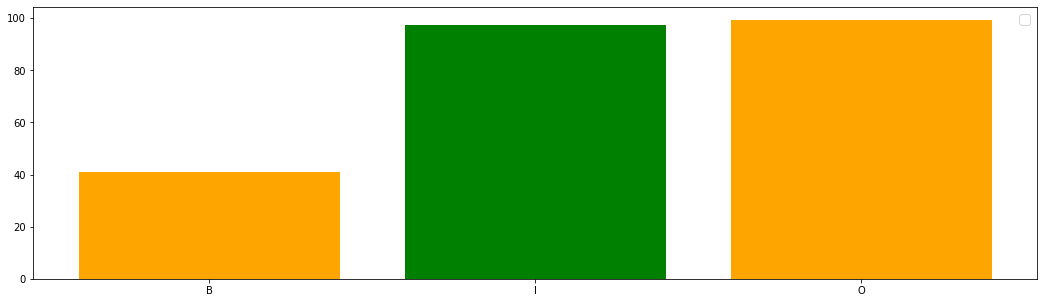

In [ ]:
import matplotlib.pylab as plt
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
plt.bar(tag_ac.keys(), tag_ac.values(), color=['orange','green'],align='center')
ax.legend(fontsize = 14)

In [ ]:
#tagged_seq_collection is a list of tagged_sequences of each fold
#test_seq_collection is a list of test_seq of each fold
print(len(tagged_seq_collection))
print(len(test_seq_collection))

5
5


In [ ]:
#Extracting the Tagged Sequences and Test Sequences of the maximum fold
tseq=[]
tset=[]
for i in range(0,len(test_seq_collection[F])):
    for j in range(0,len(test_seq_collection[F][i])):
        tset.append((test_seq_collection[F][i][j][1]))

In [ ]:
for i in range(0,len(tagged_seq_collection[F])):
        tseq.append((tagged_seq_collection[F][i][1]))

In [ ]:
len(tseq),len(tset)

(3525, 3525)

In [ ]:
#Storing allocated tags in list ltseq
ltseq=tseq

In [ ]:
#Storing  Actual tags of test_set in list ltset
ltset=tset
ltset

['B',
 'I',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B',
 'I',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B',
 'I',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B',
 'O',
 'O',
 'O',
 'B',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B',
 'O',
 'O',
 'O',
 'O',
 'B',
 'I',
 'O',
 'O',
 'B',
 'I',
 'O',
 'B',
 'I',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B',
 'I',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O'

In [ ]:
#Ultseq is list of unique tags present in the ltseq
#Ultset is list of unique tags present in the ltset
Ultset=list(set(ltset))
Ultseq=list(set(ltseq))
max(len(Ultset),len(Ultseq))

3

In [ ]:
Ultset

['B', 'O', 'I']

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
y_true = ltset
y_pred = ltseq
array=confusion_matrix(y_true, y_pred)
array

array([[ 121,    0,   10],
       [  22,   70,   11],
       [ 152,    2, 3137]])

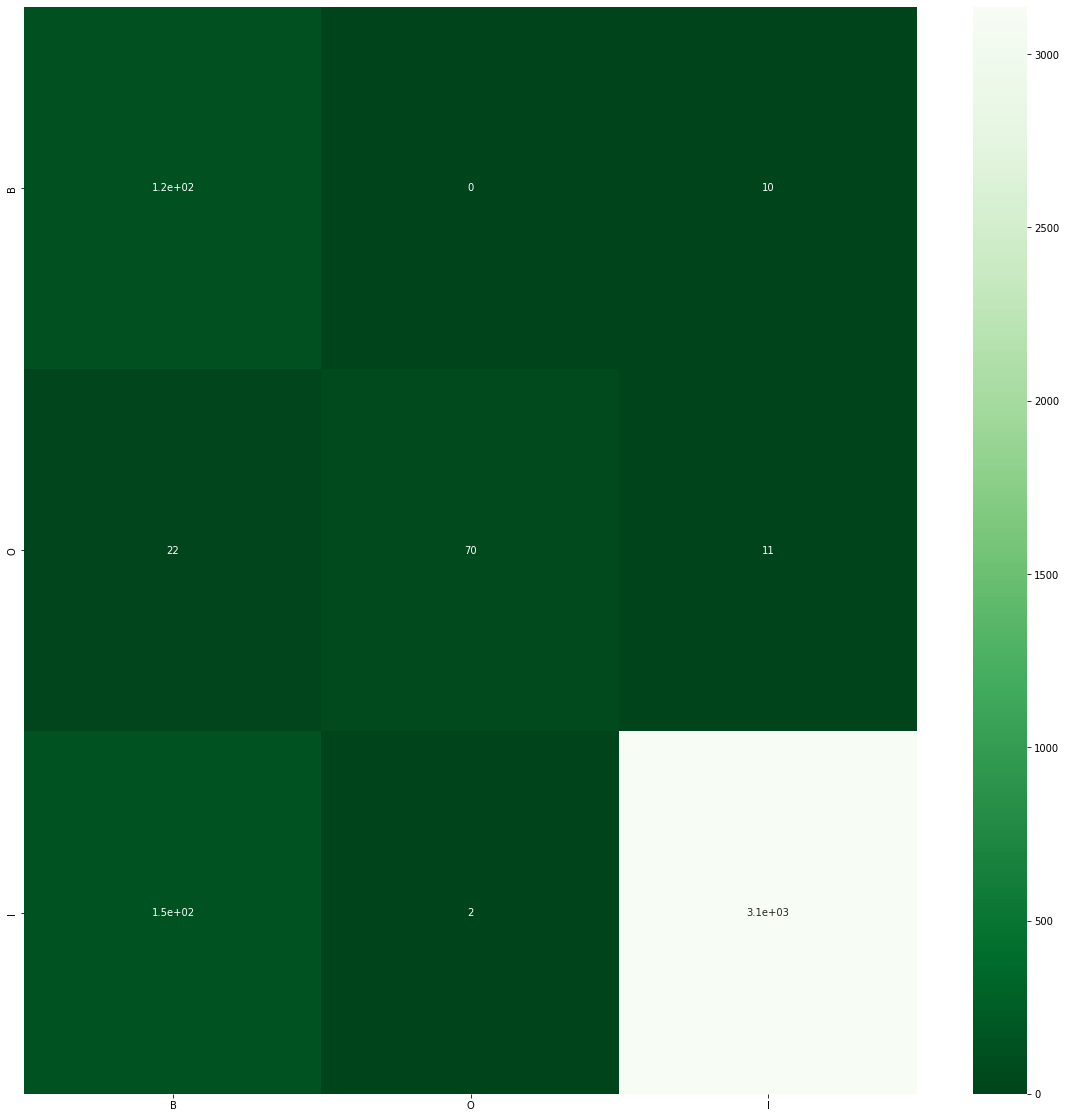

In [ ]:
df_cm = pd.DataFrame(array, index = [i for i in Ultset],columns = [i for i in Ultset])
plt.figure(figsize = (20,20))
sn.heatmap(df_cm, annot=True,cmap='Greens_r')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           B       0.41      0.92      0.57       131
           I       0.97      0.68      0.80       103
           O       0.99      0.95      0.97      3291

    accuracy                           0.94      3525
   macro avg       0.79      0.85      0.78      3525
weighted avg       0.97      0.94      0.95      3525



We will now feed the NER-Dataset--TestSet.csv into our model.

In [ ]:
dafra=pd.read_csv("NER-Dataset-TestSet.csv")

In [ ]:
dafra.head()

,@SammieLynnsMom
0,@tg1.781
1,they
2,will
3,be
4,all


In [ ]:
dafra.shape

(2001, 1)

In [ ]:
dafra.isnull().sum()

@SammieLynnsMom    100
dtype: int64

In [ ]:
dafralist=[]
for i in range(0,1891):
    dafralist.append(dafra["@SammieLynnsMom"][i])

In [ ]:
len(dafralist)

1891

In [ ]:
start = time.time()
Test_data_tagged_seq = Viterbi_Algorithm(dafralist)
end = time.time()
difference = end-start
print("Time Taken :",difference)

Time Taken : 14.562074184417725


In [ ]:
Test_data_tagged_seq

[('@tg1.781', 'B'),
 ('they', 'O'),
 ('will', 'O'),
 ('be', 'O'),
 ('all', 'O'),
 ('done', 'O'),
 ('by', 'O'),
 ('Sunday', 'O'),
 ('trust', 'B'),
 ('me', 'O'),
 ('*wink*', 'B'),
 (nan, 'B'),
 ('Made', 'B'),
 ('it', 'O'),
 ('back', 'O'),
 ('home', 'O'),
 ('to', 'O'),
 ('GA', 'B'),
 ('.', 'O'),
 ('It', 'O'),
 ('sucks', 'B'),
 ('not', 'O'),
 ('to', 'O'),
 ('be', 'O'),
 ('at', 'O'),
 ('Disney', 'B'),
 ('world', 'O'),
 (',', 'O'),
 ('but', 'O'),
 ('its', 'O'),
 ('good', 'O'),
 ('to', 'O'),
 ('be', 'O'),
 ('home', 'O'),
 ('.', 'O'),
 ('Time', 'O'),
 ('to', 'O'),
 ('start', 'O'),
 ('planning', 'B'),
 ('the', 'O'),
 ('next', 'O'),
 ('Disney', 'B'),
 ('World', 'B'),
 ('trip', 'O'),
 ('.', 'O'),
 (nan, 'B'),
 ("'", 'O'),
 ('Breaking', 'B'),
 ('Dawn', 'B'),
 ("'", 'O'),
 ('Returns', 'B'),
 ('to', 'O'),
 ('Vancouver', 'B'),
 ('on', 'O'),
 ('January', 'B'),
 ('11th', 'B'),
 ('http://bit.ly/dbDMs8', 'B'),
 (nan, 'B'),
 ('@ls_n', 'B'),
 ('perhaps', 'B'),
 (',', 'O'),
 ('but', 'O'),
 ('folks', 'B'),
 